In [3]:
from labmate.utils import autoreload

In [4]:
class Test: 
    __annotations__: dict[str, type]
    a: int = 1
    def __init__(self) -> None:
        b: int = 2

try:
    print(Test().__annotations__)
except AttributeError:
    print("instance error")
        
try:
    print(Test.__annotations__)
except AttributeError:
    print("class error")

{'__annotations__': dict[str, type], 'a': <class 'int'>}
{'__annotations__': dict[str, type], 'a': <class 'int'>}


In [5]:
from copy import deepcopy


def complete_dict(sub_dict):
    """Helper function to handle '.' definition of element in variations.

    Args:
        sub_dict (Dict[str, Any]): Dictionnary taken from variation.

    Returns:
        Dict[str, Any]: Dictionnary completed with full structure.
    """
    sub_dict = deepcopy(sub_dict)
    full_dict = {}

    for key, val in list(sub_dict.items()):
        if "." not in key:
            full_dict[key] = val
            continue
        splt = key.split(".")
        local = full_dict
        for k in splt[:-1]:
            local = local.setdefault(k, {})
        local[splt[-1]] = val
    return full_dict

a = complete_dict({'a':1, 'b.c': 3, 'b.d': 4})
b = a
b['a'] = 2
print(a)
print(b)

{'a': 2, 'b': {'c': 3, 'd': 4}}
{'a': 2, 'b': {'c': 3, 'd': 4}}


In [6]:
a = {}
b = a.setdefault("a", {''})
b = a.setdefault("a", {})

In [7]:
b = {'b':3}
a = {'a':2}

In [8]:
def upd(d):
    d['a']=1

In [9]:
upd(a)
a

{'a': 1}

In [10]:
a.update(**b)

In [11]:
a

{'a': 1, 'b': 3}

In [12]:
b['b']=2

In [13]:
a

{'a': 1, 'b': 3}

In [14]:
def test1():
    full_dict = {}
    k = "123"
    if k not in full_dict:
        full_dict[k] = {}

def test2():
    full_dict = {}
    k = "123"
    full_dict.setdefault(k, {})

In [15]:
%timeit test1()

167 ns ± 32.6 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [16]:
%timeit test2()

KeyboardInterrupt: 

In [ ]:
a

{'a': 2, 'b': {'c': 3}}

In [ ]:
import dict_utils

In [ ]:
d= {'a':1, 'b':2, 'c': {'e': 3, 'd': '$.b'}} + {'a':1}
dict_utils.resolve_links(d)
d

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [ ]:
import inherit
from typing import Any, Dict, Optional, TypeVar, Union, Generic, Protocol

from generic_types import Variable


[autoreload of inherit failed: Traceback (most recent call last):
  File "/Users/4cd87a/anaconda3/envs/phd-main/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/4cd87a/anaconda3/envs/phd-main/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/4cd87a/anaconda3/envs/phd-main/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/4cd87a/Documents/Projects/PhD/codes/drawable/drawable/inherit.py", line 11, in <module>
    from . import utils, yaml_utils, dict_utils, populate
ImportError: attempted relative import with no known parent package
]


In [ ]:
from yaml_heritage import yaml_utils

In [ ]:
yaml_utils.load_single_yaml_file('test_link.yaml', 'data')

{'database': {'server': {'ip': '192.168.1.5', 'port': 2000},
  'db_name': 'test',
  'user': {'name': 'root', 'password': 'root'},
  'number': '123'},
 'foo_database': {'server': {'ip': '192.168.1.5', 'port': 2000},
  'db_name': 'foo',
  'user': {'name': 'root', 'password': 'foo_root'},
  'number': '123'}}

In [ ]:
c._folder

'data'

In [ ]:
import yaml_heritage
from yaml_heritage import Heritage, Variable

In [ ]:
class Class1(Heritage):
    val1: int
    val2: int

class Class2(Heritage):
    class1: Class1
    val3: float

In [ ]:
c = Class2.load('data', 'test.yaml')
c.val3

789.2

In [ ]:
class Test:
    param1: int
    
    def __init__(self) -> None:
        print(hasattr(self, 'param1'))
        
Test()

False


In [ ]:
square_size = 381_000
fold_count = 0
while square_size>21:
    square_size = square_size/2
    fold_count +=2
print(f"folded {fold_count} times. Final size = {square_size}.")
paper_thickness = 100e-6  # to check
print(f"thickness = {paper_thickness*(2**fold_count)}")

folded 30 times. Final size = 11.627197265625.
thickness = 107374.1824


In [ ]:
from scipy.interpolate import UnivariateSpline

# Create a UnivariateSpline object
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]
spline = UnivariateSpline(x, y)

# Get the coefficients of the UnivariateSpline object
tck = spline._eval_args

# Recreate the UnivariateSpline object using the coefficients and the x data
spline_new = UnivariateSpline(spline.x, None, k=spline.k, s=spline.s)
spline_new._eval_args = tck

# Test that the new spline is the same as the original
assert spline(x).all() == spline_new(x).all()

AttributeError: 'UnivariateSpline' object has no attribute 'x'

In [ ]:
from scipy.interpolate import UnivariateSpline

# Create a UnivariateSpline object
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]
spline = UnivariateSpline(x, y)

# Get the coefficients of the UnivariateSpline object
tck = spline._eval_args

# Recreate the UnivariateSpline object using the coefficients and the x data
spline_new = UnivariateSpline(spline._data[0], None, k=spline.k, s=spline.s)
spline_new._eval_args = tck

# Test that the new spline is the same as the original
assert spline(x).all() == spline_new(x).all()

AttributeError: 'UnivariateSpline' object has no attribute 'k'

In [ ]:
from scipy.interpolate import UnivariateSpline

# Create a UnivariateSpline object
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]
spline = UnivariateSpline(x, y)

# Get the coefficients of the UnivariateSpline object
tck = spline._eval_args

# Recreate the UnivariateSpline object using the coefficients and the x data
spline_new = UnivariateSpline(spline._data[0], None, k=spline._data[2], s=spline._data[3])
spline_new._eval_args = tck

# Test that the new spline is the same as the original
assert spline(x).all() == spline_new(x).all()

ValueError: x and y should have a same length

In [24]:
display.display_functions.display

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

In [25]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.core import display
display = display.display_functions.display


def but(name):
    button = widgets.Button(description=name)
    def on_button_click(b):
        print(f"Button {name} clicked.")


    button.on_click(on_button_click)
    display(button)
    display(button)
    return button

In [26]:
def plot_data():
    plt.figure()
    plt.plot([1,2], [3,4])
    plt.show()

In [33]:
def create_button(func, *args):
    """Create a button with name of the function and run function onclick."""
    name = func.__name__.replace('_', ' ')
    button = widgets.Button(description=name)

    def on_button_click(_):
        func(*args)

    button.on_click(on_button_click)
    display(button)
    display(button)
    return button

In [34]:
create_button(plot_data)

Button(description='plot data', style=ButtonStyle())

Button(description='plot data', style=ButtonStyle())

Button(description='plot data', style=ButtonStyle())

Button(description='h2', style=ButtonStyle())

Button(description='h2', style=ButtonStyle())

Button(description='h3', style=ButtonStyle())

Button(description='h3', style=ButtonStyle())

Button h2 clicked.


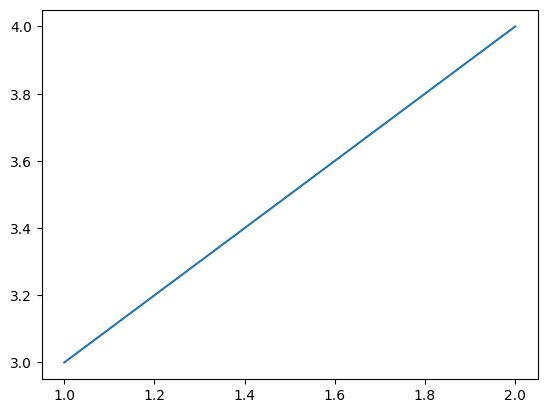

Button h3 clicked.


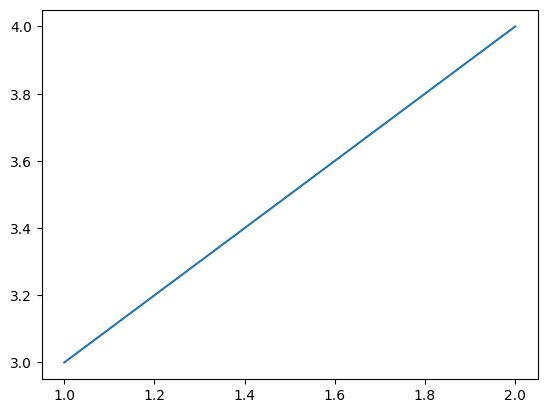

In [2]:
h1 = but("h2")
h2 = but("h3")

In [3]:
from labmate.syncdata import SyncData

In [ ]:
from labmate.utils import autoreload

In [4]:
from IPython.core.getipython import get_ipython
shell = get_ipython()

In [8]:
print(12)
shell.cleanup()

12
